# Visualization of particles

## Import packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import time
%matplotlib inline

## Variables
Change these variables to change the settings for the animation

In [18]:
save_video = True
fps = 20    # Frames per second
color = 'b'
dpi = 200   # Dots per inch (i.e. resolution)
boxsize = [20, 20, 20]   # Length of each side of the box
particlesize = 1            # Size of particles 
filename = "test123.txt"    # Insert file name here (must be txt format)
videoname = "test_animation.mp4"    # Name of the rendered video. Must include file format

## Data Extraction

In [19]:
simulation = []
with open(filename) as txtdata:
    for frame in txtdata.readlines():
        frame_arr = []
        for particle in frame.split('\t')[:-1]:
            frame_arr.append(np.array([coord for coord in particle.split(' ')][:-1], dtype=float))
        simulation.append(frame_arr)

simulation = np.array(simulation)
print("Number of frames:", simulation.shape[0], 
      "\nNumber of particles:", simulation.shape[1], 
      "\nNumber of dimensions:", simulation.shape[2])

Number of frames: 100 
Number of particles: 100 
Number of dimensions: 3


## Animation

time taken to render video: 28.97600746154785 s


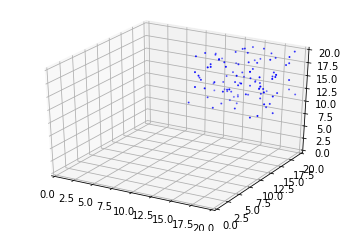

In [20]:
frames = []
fig = plt.figure()
ax = plt.axes(projection='3d')

for frame in simulation:
    scatter = ax.scatter(frame[:, 0], frame[:, 1], frame[:, 2], s=particlesize, c=color, animated=True)
    frames.append([scatter])

ax.set_xlim(0, boxsize[0])
ax.set_ylim(0, boxsize[1])
ax.set_zlim(0, boxsize[2])

interval = int(1/fps*1000)
ani = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat=False)

if save_video:
    before = time.time()
    ani.save(f'../videos/{videoname}', dpi=dpi)
    after = time.time()
    print("time taken to render video:", after - before, "s")

# Random data generator

In [6]:
nparticles = 100
nframes = 100
a = np.random.uniform(0, 10, size=(nparticles, 3))
with open(filename, 'w') as txt:
    for i in range(nframes):
        a += 0.1
        for col in a:
            for i in col:
                txt.write(str(i) + " ")
            txt.write("\t")
        txt.write("\n")